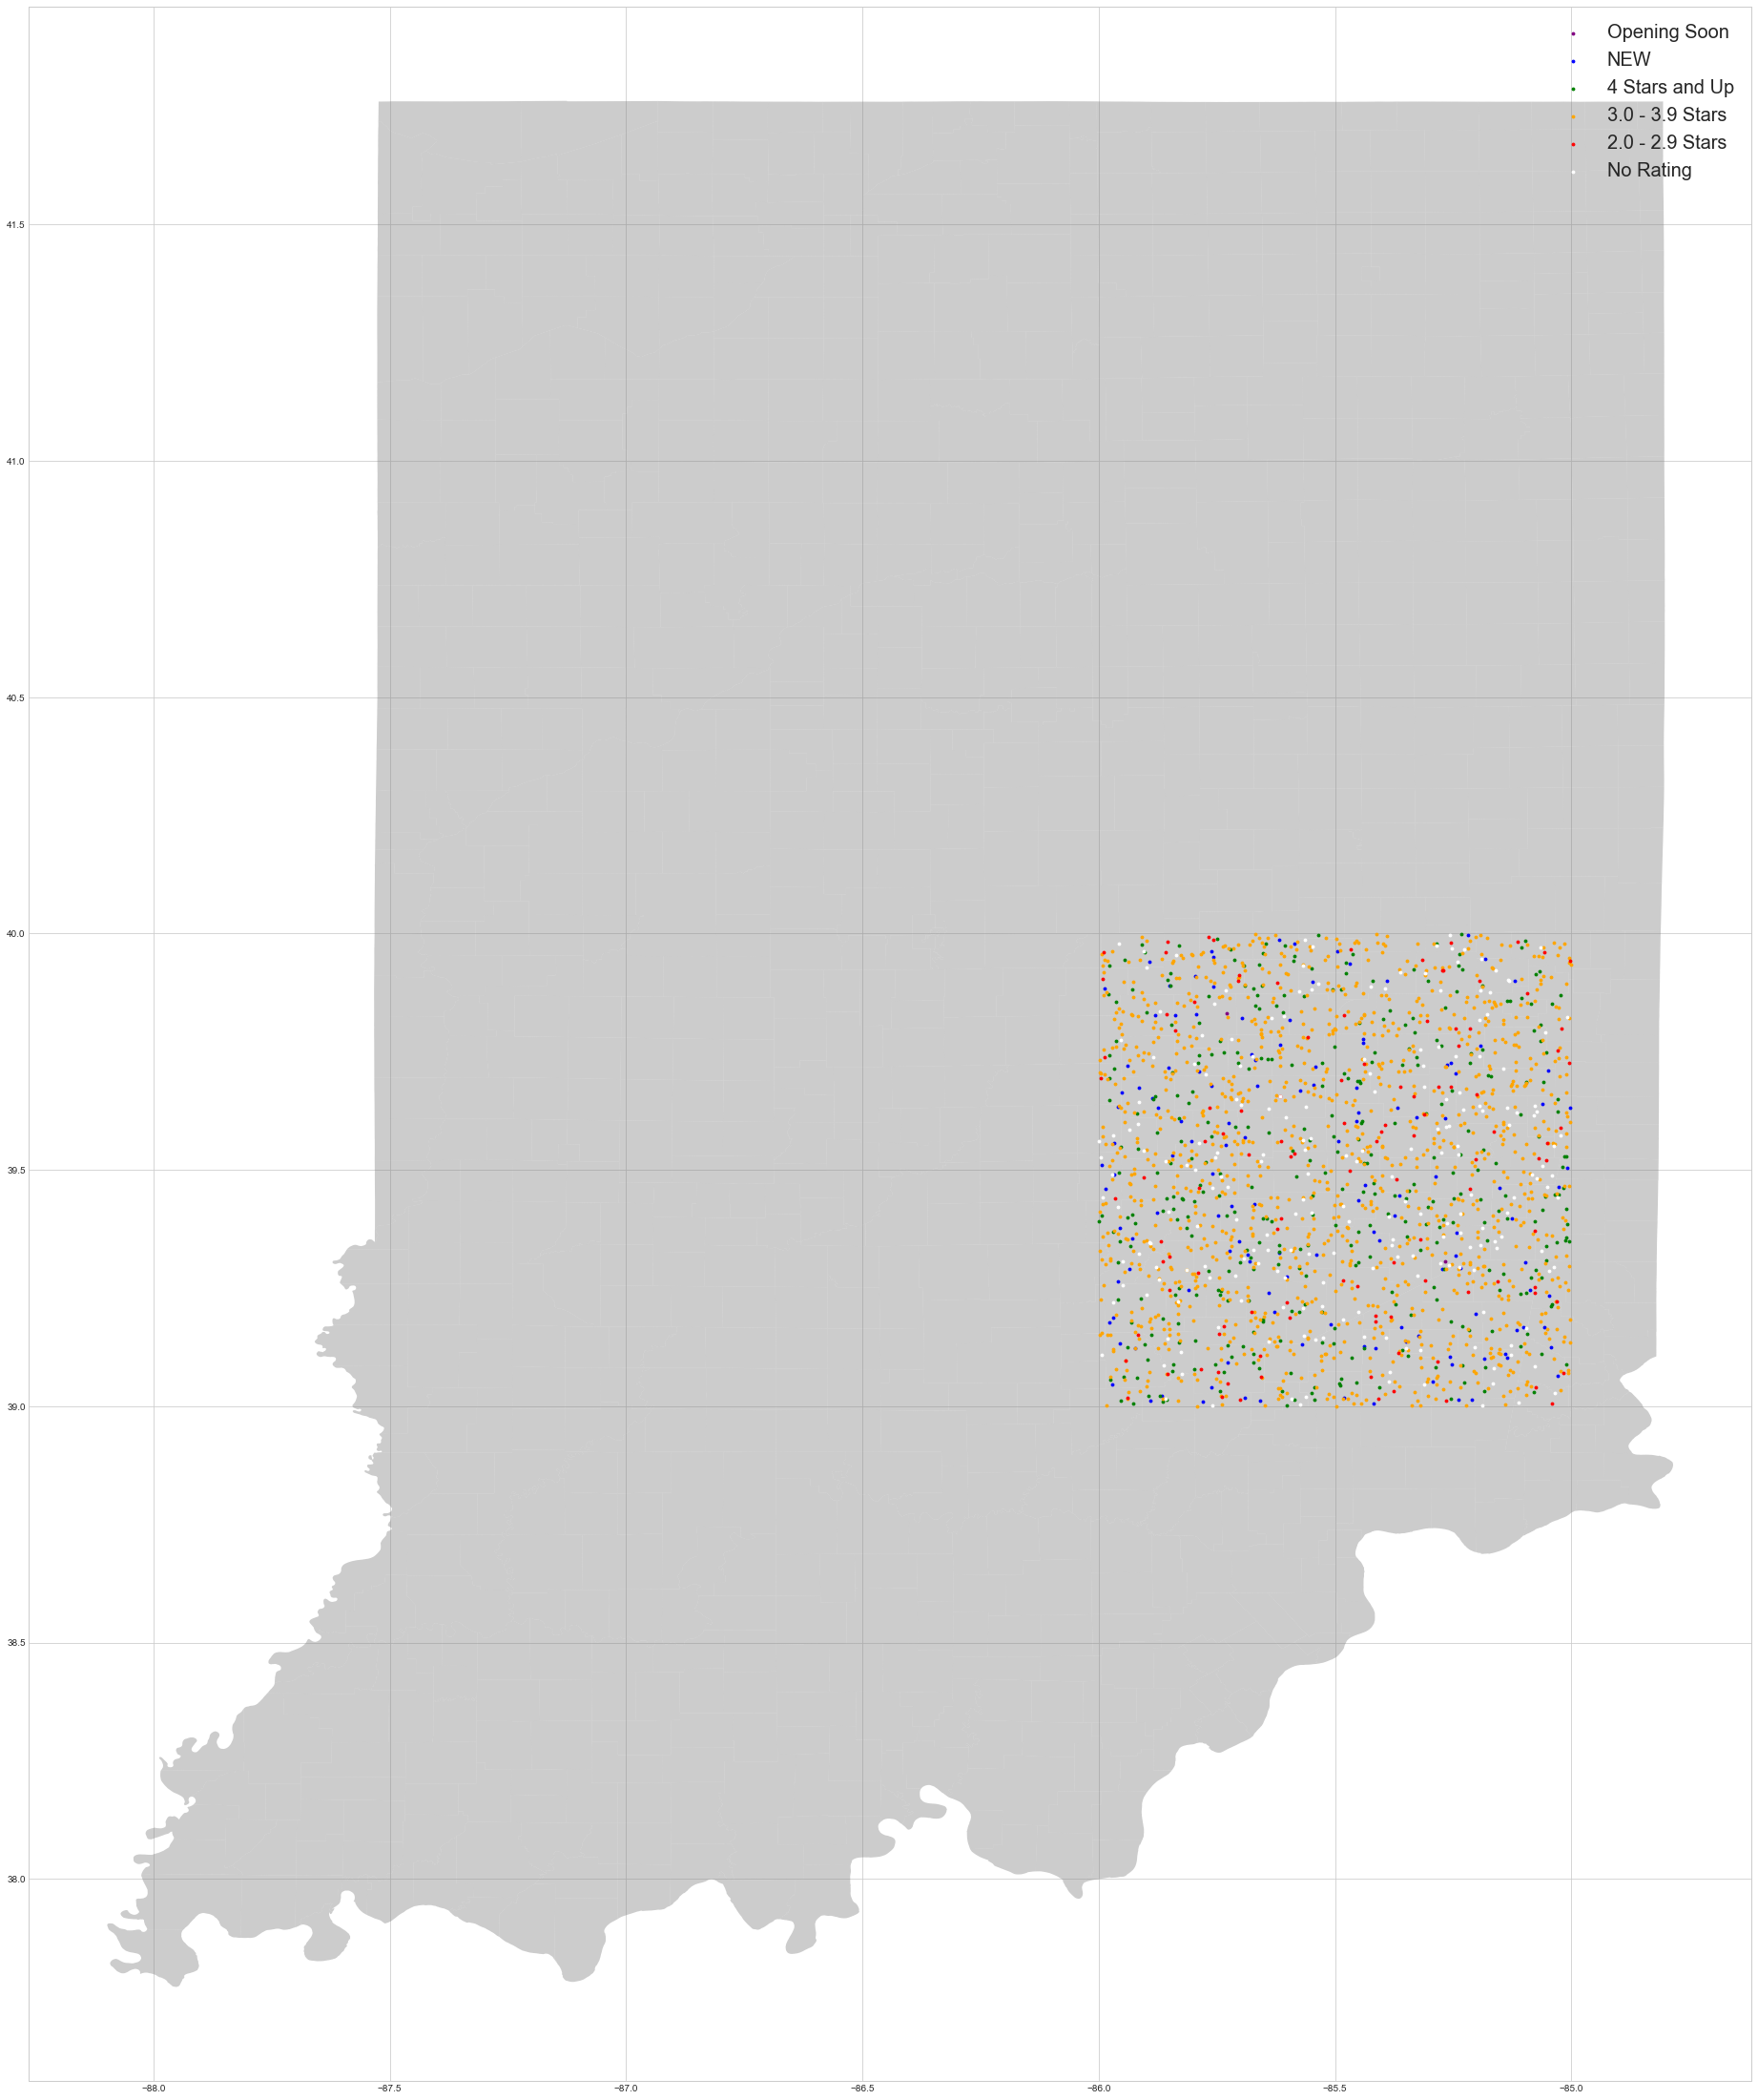

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import operator
import csv

#reference: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

%matplotlib inline

map = gpd.read_file('./tl_2017_18_cousub/tl_2017_18_cousub.shp')

fig,ax = plt.subplots(figsize = (40,40))
map.plot(ax = ax, alpha = 0.4, color = "grey")


csv = pd.read_csv('2020-XTern-DS.csv', sep=',')
csv = csv.sort_values(by=['Rating'], ascending=False)
crs = {'init': 'epsg:4326'}

geometry = [Point(xy) for xy in zip(csv["Longitude"], csv["Latitude"])]

geo_csv = gpd.GeoDataFrame(csv, crs = crs, geometry = geometry)

index = 0
for i in geo_csv.itertuples():
    if i.Rating == 'Opening Soon':
        lastOpen = index + 1
    elif i.Rating == 'NEW':
        lastNew = index + 1
    elif i.Rating == '-':
        lastDash = index + 1
    elif float(i.Rating) >= 4.0:
        last4 = index + 1
    elif float(i.Rating) >= 3.0:
        last3 = index + 1
    elif float(i.Rating) >= 2.0:
        last2 = index + 1
    index += 1    

geo_csv[0:lastOpen].plot(ax = ax, markersize = 8, color = "purple", marker = "o", label = "Opening Soon")
geo_csv[lastOpen:lastNew].plot(ax = ax, markersize = 8, color = "blue", marker = "o", label = "NEW")
geo_csv[lastNew:last4].plot(ax = ax, markersize = 8, color = "green", marker = "o", label = "4 Stars and Up")
geo_csv[last4:last3].plot(ax = ax, markersize = 8, color = "orange", marker = "o", label = "3.0 - 3.9 Stars")
geo_csv[last3:last2].plot(ax = ax, markersize = 8, color = "red", marker = "o", label = "2.0 - 2.9 Stars")
geo_csv[last2:lastDash].plot(ax = ax, markersize = 8, color = "white", marker = "o", label = "No Rating")
plt.legend(prop = {'size':20})



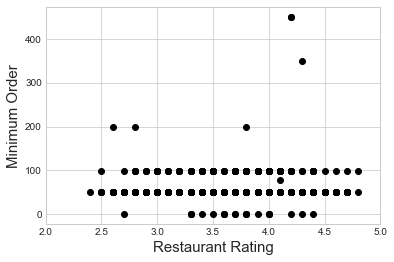

In [211]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
#reference: https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d

x = []
y = []
index = 0
for i in geo_csv.itertuples():
    if i.Rating != 'Opening Soon' and i.Rating != '-' and i.Rating != 'NEW':
        x.append(float(i.Rating))
        y.append(float(i.Minimum_Order[1:]))
    index += 1

plt.xlabel('Restaurant Rating', fontsize=15)
plt.ylabel('Minimum Order', fontsize=15)
plt.xlim(2, 5)

plt.plot(x, y, 'o', color='black');
